## Observations and Insights 

1. There is a strong correlation between mouse weight and tumor volume. 
2. Based on the sample mouse pulled for Capomulin there is a clear decrease in tumor volume over time.
3. Capomulin was tested on the most mice. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mousestudy_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
total_mice = len(mousestudy_results["Mouse ID"].unique())
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse = mousestudy_results.loc[mousestudy_results["Mouse ID"] == "g989", :]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mousestudy_results.loc[mousestudy_results["Mouse ID"] != "g989", :]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grouped_data = mousestudy_results.groupby("Drug Regimen")
summary_df = pd.DataFrame({
    "Mean" : grouped_data["Tumor Volume (mm3)"].mean(),
    "Median" : grouped_data["Tumor Volume (mm3)"].median(),
    "Variance" : grouped_data["Tumor Volume (mm3)"].var(),
    "Standard Deviation" : grouped_data["Tumor Volume (mm3)"].std(),
    "SEM" : grouped_data["Tumor Volume (mm3)"].sem()
})
summary_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

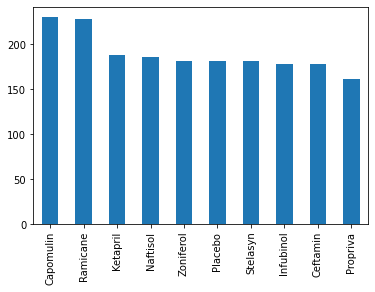

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = mousestudy_results["Drug Regimen"].value_counts()
mice_count.plot(kind="bar")

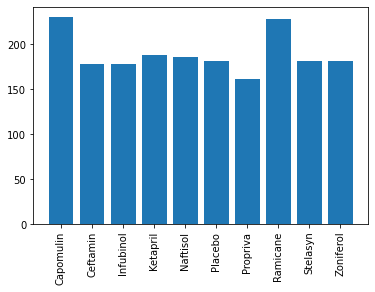

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = np.arange(len(summary_df))
count = grouped_data["Mouse ID"].count()
tick_locations = [value for value in x]

plt.bar(x,count)
plt.xticks(tick_locations, list(summary_df.index), rotation="vertical");

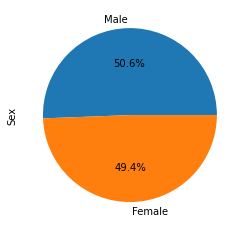

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_mice = mousestudy_results["Sex"].value_counts()
pie_mice.plot(kind="pie", autopct='%1.1f%%')

''

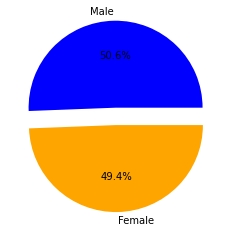

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "orange"]
explode = (.2,0)
plt.pie(pie_mice.values, labels=pie_mice.index.values, colors=colors, explode=explode, autopct='%1.1f%%')
;

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mice = mousestudy_results.groupby('Mouse ID')
max_time = grouped_mice["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(max_time, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a262,45,Placebo,Female,17.0,29.0,70.717621,4.0
3,a275,45,Ceftamin,Female,20.0,28.0,62.999356,3.0
4,a366,30,Stelasyn,Female,16.0,29.0,63.440686,1.0
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12.0,26.0,48.710661,0.0
245,z578,45,Ramicane,Male,11.0,16.0,30.638696,0.0
246,z581,45,Infubinol,Female,24.0,25.0,62.754451,3.0
247,z795,45,Naftisol,Female,13.0,29.0,65.741070,3.0


In [27]:
 # Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}");

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


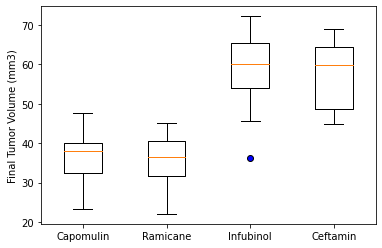

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='blue',markersize=6)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

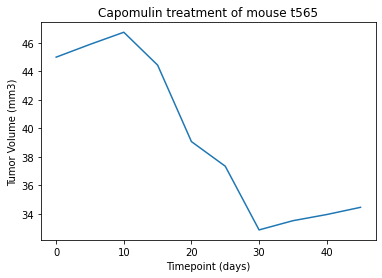

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mousedata = capomulin.loc[capomulin["Mouse ID"] == "t565"]
plt.plot(mousedata["Timepoint"],mousedata["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse t565")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

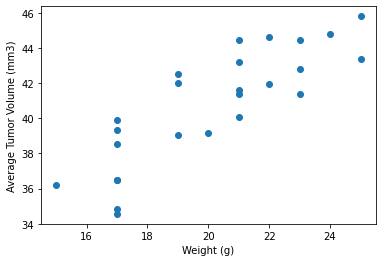

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


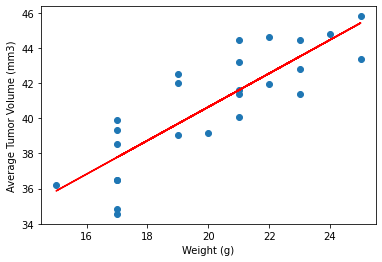

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate correlation using pearsonr and the chart using linregress function
correlation = round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

y_values = capomulin_avg['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

0.9544396890241045